# Airbnb Pricing Predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [2]:
df_listing_final=pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listing_final3.csv')
df_listing_final.head()

,Unnamed: 0,host_response_time,host_response_rate,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t
0,3,4,1.000000,5371,-34.509717,138.816127,2,1.0,1.0,1.0,...,0,0,0,1,0,0,1,0,1,0
1,5,4,1.000000,5118,-34.605631,138.648229,3,1.0,1.0,2.0,...,0,0,1,0,0,0,1,0,1,0
2,8,4,1.000000,5355,-34.488111,138.924490,16,8.0,8.0,1.0,...,0,0,0,1,0,0,1,0,1,0
3,9,0,0.951288,5353,-34.499428,139.044344,2,1.0,1.0,1.0,...,0,1,0,0,0,0,1,0,1,0
4,12,2,0.500000,5355,-34.472304,139.009037,2,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0


In [3]:
df_listing_final.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV, LassoCV, Lasso, LinearRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBRegressor
from sklearn.grid_search import GridSearchCV
import sklearn.linear_model as linear_model
import seaborn as sns
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
D:\Users\ivans\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Sampling

In [5]:
df_sample = df_listing_final.sample(n=20000)

## Price normalization
Due to there is too many outliner, we decide to normalize the price.

In [6]:
# df_sample['std_price']= df_sample['price'].apply(lambda x : np.log(x))
# df_sample['std_price']= df_sample['std_price'].replace([np.inf, -np.inf], 0)

In [7]:
# # visualize distribution of price (target variable)
# plt.hist(df_sample['std_price'], bins=30)
# plt.title("Histogram of Pricing Log-Transformed")
# plt.xlabel("Pricing (AUD) Per Day")
# plt.ylabel("Frequency")
# plt.show()

### Defined X and Y

In [8]:
ss = StandardScaler()

X = df_sample.drop(['price'], axis=1)
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
y = df_sample.price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

Xs_train = pd.DataFrame(ss.fit_transform(X_train), columns=X.columns)
Xs_test = pd.DataFrame(ss.fit_transform(X_test), columns=X.columns)

### KNeighbors Regressor (KNN)- Find the best k

In [9]:
def find_best_k_cls(Xs_train, y_train, k_min=1, k_max=20, step=2, cv=5):
    k_range = range(k_min, k_max+1, step)
    accs = []
    for k in k_range:
        knn = KNeighborsRegressor(n_neighbors=k)
        scores = cross_val_score(knn, Xs_train, y_train, cv=cv)
        accs.append(np.mean(scores))
    print np.max(accs), np.argmax(k_range)
    return np.argmax(k_range)
find_best_k_cls(Xs_train, y_train)

0.4746249035891476 9


9

In [10]:
# knn = KNeighborsRegressor(n_neighbors= 9)
# knn.fit(Xs_train, y_train)

# Model used 

### 1. LinearRegression
### 2. RidgeCV
### 3. LassoCV
### 4. ElasticNetCV
### 5. BayesianRidge 
### 6. OrthogonalMatchingPursuit- A sparse approximation algorithm which involves finding the "best matching" projections of multidimensional data onto the span of an over-complete (i.e., redundant) dictionary.
### 7. Features selection
### 8. Recursive Feature Elimination (RFE)
### 9. GridSearch and SGDRegressor
### 10. RandomizedSearchCV and RandomForestRegressor
### 11. GridSearchCV and XGBRegressor


## Linear Regression Model

In [11]:
# Set the parameters
lr = LinearRegression(fit_intercept=True)

# Fit linear model
lr.fit(Xs_train, y_train)


# print "LinearRegression- Train R2 score:", lr.score(Xs_train, y_train)
print "LinearRegression- Test R2 score:", lr.score(Xs_test, y_test)

LinearRegression- Test R2 score: -3.3793762623817618e+22


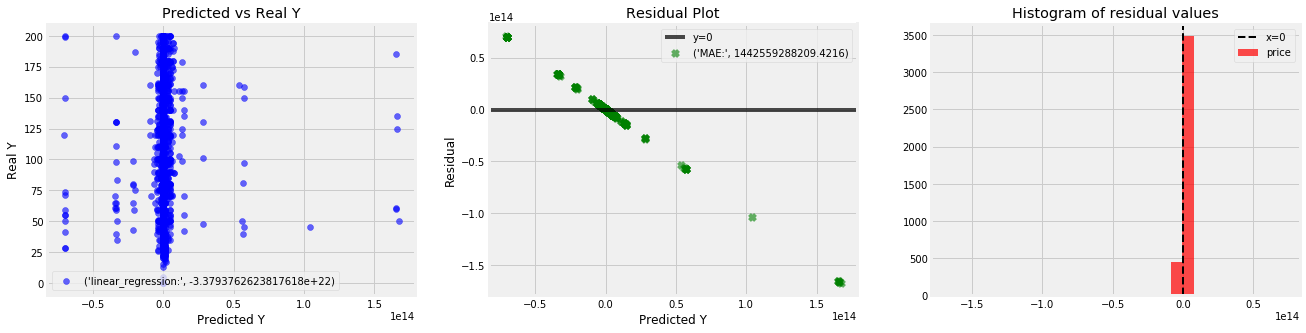

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lr.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", lr.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lr.predict(Xs_test), y_test-lr.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lr.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lr.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [13]:
#Cross-validate the linear R2
lr_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lr.coef_,
                            'abs_coef':np.abs(lr.coef_)})

lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lr_coefs.head(20)

,abs_coef,coef,variable
22,1.183178e+14,-1.183178e+14,is_location_exact_f
23,1.183178e+14,-1.183178e+14,is_location_exact_t
40,7.786223e+13,-7.786223e+13,property_type_Cycladic house (Greece)
68,4.994982e+13,-4.994982e+13,room_type_Entire home/apt
69,4.974177e+13,-4.974177e+13,room_type_Private room
18,4.641210e+13,-4.641210e+13,host_has_profile_pic_t
17,4.238021e+13,-4.238021e+13,host_has_profile_pic_f
19,3.104798e+13,-3.104798e+13,host_identity_verified_None
75,2.893364e+13,2.893364e+13,bed_type_Real Bed
51,2.883338e+13,-2.883338e+13,property_type_Houseboat


### Linear Regression Analysis
Linear Regression achieves acheive a pretty good R2 score on the train set, however, an extremely negative R2 sscore score on the test set which

## Ridge Regression

In [14]:
rr = RidgeCV(alphas=10.**np.linspace(-10, 5, 10), fit_intercept=True)

rr.fit(Xs_train, y_train)

print "Ridge Regression- Test R2 score:", rr.score(Xs_test, y_test)

Ridge Regression- Test R2 score: 0.4784136566636499


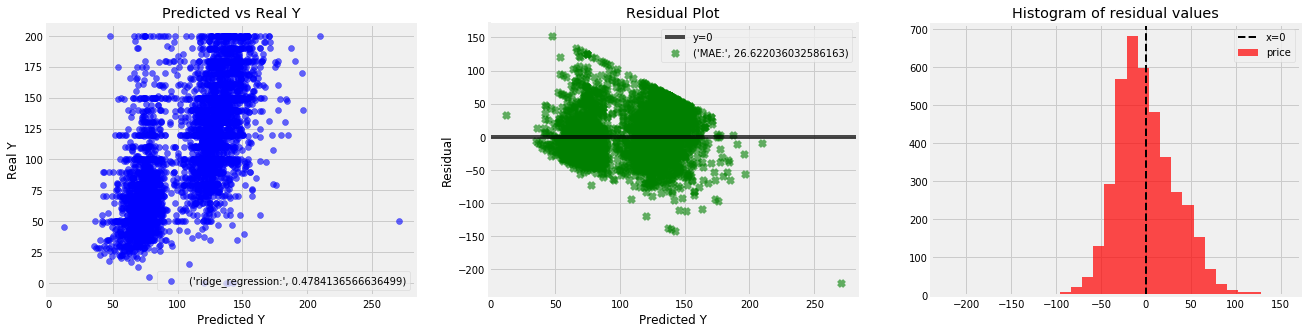

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(rr.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("ridge_regression:", rr.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rr.predict(Xs_test), y_test-rr.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rr.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rr.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [16]:
#Cross-validate the linear R2 with the optimal alpha
rr_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':rr.coef_,
                            'abs_coef':np.abs(rr.coef_)})

rr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

rr_coefs.head(20)

,abs_coef,coef,variable
68,11.816198,11.816198,room_type_Entire home/apt
69,10.293360,-10.293360,room_type_Private room
5,9.681706,9.681706,accommodates
70,5.890306,-5.890306,room_type_Shared room
4,5.625124,5.625124,longitude
27,3.805010,3.805010,property_type_Bed and breakfast
34,3.205407,-3.205407,property_type_Campsite
7,2.817629,2.817629,bedrooms
29,2.480713,2.480713,property_type_Boutique hotel
3,2.151948,2.151948,latitude


## Lasso Regression

In [17]:
#Find the best alpha parameter through cross-validation
optimal_lasso = LassoCV(n_alphas=500, cv=9, verbose=1)
optimal_lasso.fit(Xs_train, y_train)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.07999484116266588


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s finished


In [18]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(Xs_train, y_train)

print "Lasso Regression- Test R2 score:", lasso.score(Xs_test, y_test)

Lasso Regression- Test R2 score: 0.47951168606310574


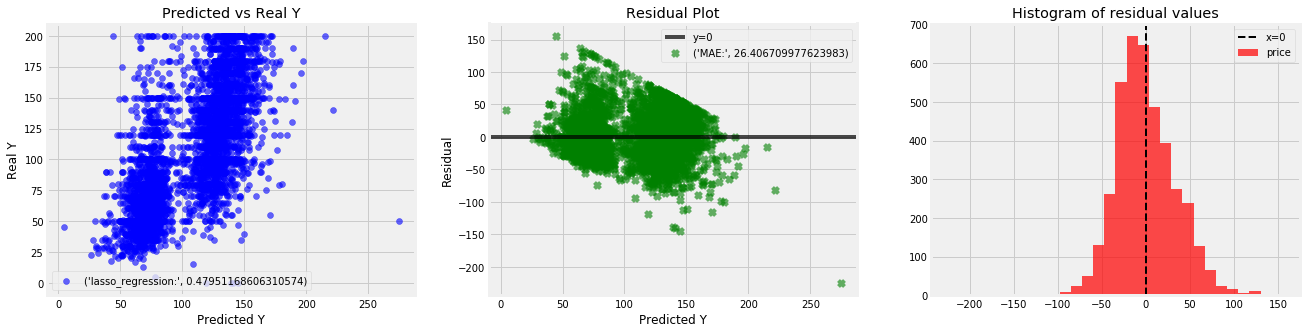

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(lasso.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("lasso_regression:", lasso.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(lasso.predict(Xs_test), y_test-lasso.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - lasso.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [20]:
#Cross-validate the linear R2 with the optimal alpha
lasso_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
68,23.498400,23.498400,room_type_Entire home/apt
5,12.769221,12.769221,accommodates
4,8.645505,8.645505,longitude
27,4.531998,4.531998,property_type_Bed and breakfast
2,3.686277,3.686277,zipcode
3,3.620216,3.620216,latitude
70,3.431715,-3.431715,room_type_Shared room
8,3.200834,-3.200834,beds
29,2.818651,2.818651,property_type_Boutique hotel
34,2.708017,-2.708017,property_type_Campsite


## ElasticNet Regression

In [21]:
elastic = ElasticNetCV()

elastic.fit(Xs_train, y_train)

print "Elastic Regression- Test R2 score:", elastic.score(Xs_test, y_test)

Elastic Regression- Test R2 score: 0.47993622115843526


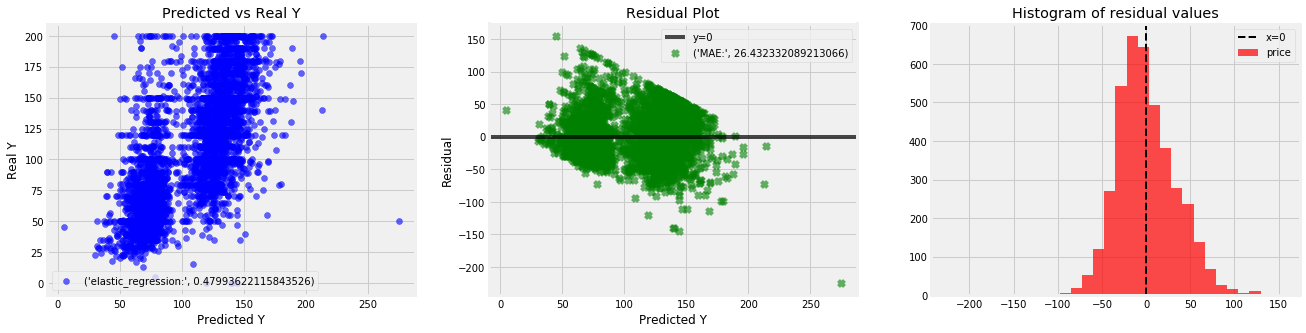

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(elastic.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("elastic_regression:", elastic.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(elastic.predict(Xs_test), y_test-elastic.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, elastic.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - elastic.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [23]:
elastic_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':elastic.coef_,
                            'abs_coef':np.abs(elastic.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)

,abs_coef,coef,variable
68,12.535824,12.535824,room_type_Entire home/apt
5,11.710495,11.710495,accommodates
69,10.624710,-10.624710,room_type_Private room
4,7.692675,7.692675,longitude
70,6.230241,-6.230241,room_type_Shared room
27,4.274268,4.274268,property_type_Bed and breakfast
3,3.161073,3.161073,latitude
34,2.982859,-2.982859,property_type_Campsite
2,2.842579,2.842579,zipcode
29,2.729172,2.729172,property_type_Boutique hotel


## BayesianRidge

In [24]:
bayes = BayesianRidge()

bayes.fit(Xs_train, y_train)

print "Bayesian Ridge Regression- Test R2 score:", bayes.score(Xs_test, y_test)

Bayesian Ridge Regression- Test R2 score: 0.47939723130747997


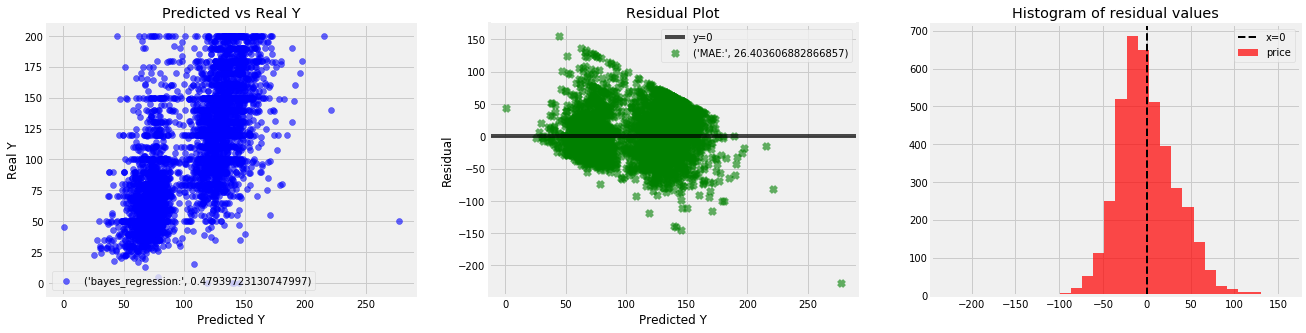

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(bayes.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("bayes_regression:", bayes.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(bayes.predict(Xs_test), y_test-bayes.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, bayes.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - bayes.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [26]:
bayes_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':bayes.coef_,
                            'abs_coef':np.abs(bayes.coef_)})

bayes_coefs.sort_values('abs_coef', inplace=True, ascending=False)

bayes_coefs.head(20)

,abs_coef,coef,variable
5,12.755857,12.755857,accommodates
68,12.502255,12.502255,room_type_Entire home/apt
69,10.862144,-10.862144,room_type_Private room
4,8.972698,8.972698,longitude
70,6.340402,-6.340402,room_type_Shared room
27,4.376276,4.376276,property_type_Bed and breakfast
2,4.084517,4.084517,zipcode
3,3.820647,3.820647,latitude
8,3.308789,-3.308789,beds
29,2.809475,2.809475,property_type_Boutique hotel


## Orthogonal Matching Pursuit

In [27]:
OMP = OrthogonalMatchingPursuit()

OMP.fit(Xs_train, y_train)

print "OMP Regression- Test R2 score:", OMP.score(Xs_test, y_test)

OMP Regression- Test R2 score: 0.4624203494298188


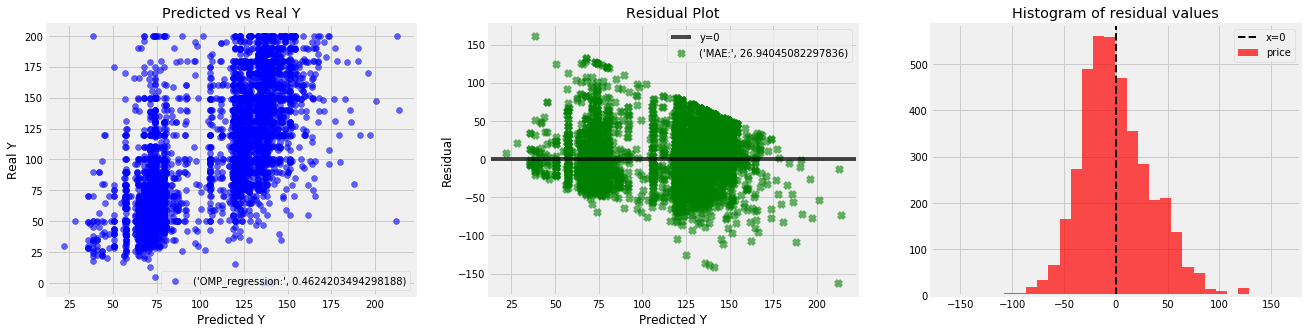

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(OMP.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("OMP_regression:", OMP.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(OMP.predict(Xs_test), y_test-OMP.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, OMP.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - OMP.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [29]:
OMP_coefs = pd.DataFrame({'variable':Xs_train.columns,
                            'coef':OMP.coef_,
                            'abs_coef':np.abs(OMP.coef_)})

OMP_coefs.sort_values('abs_coef', inplace=True, ascending=False)

OMP_coefs.head(20)

,abs_coef,coef,variable
68,24.171153,24.171153,room_type_Entire home/apt
5,11.747059,11.747059,accommodates
4,5.672013,5.672013,longitude
27,4.859574,4.859574,property_type_Bed and breakfast
70,3.877653,-3.877653,room_type_Shared room
34,3.171951,-3.171951,property_type_Campsite
29,2.855343,2.855343,property_type_Boutique hotel
80,2.493216,2.493216,cancellation_policy_strict_14_with_grace_period
57,0.000000,0.000000,property_type_Resort
62,0.000000,0.000000,property_type_Townhouse


## Features selection

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Build the selector — we'll build one with each score type.
skb_fr = SelectKBest(f_regression, k=9)

# Train the selector on the data.
# skb_f.fit(Xs_train, y_train)
# skb_chi2.fit(Xm_train, y_train)
skb_fr.fit(Xs_train, y_train)

# Examine the results.
kbest = pd.DataFrame([Xs_train.columns, list(skb_fr.scores_)], 
                     index=['feature','f_reg']).T.sort_values('f_reg', ascending=False)
kbest




D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in divide
  corr /= X_norms
D:\Users\ivans\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Users\ivans\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Users\ivans\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,feature,f_reg
68,room_type_Entire home/apt,10708.5
69,room_type_Private room,8508.11
5,accommodates,4892.95
8,beds,1498.85
7,bedrooms,1490.86
78,cancellation_policy_flexible,859.505
80,cancellation_policy_strict_14_with_grace_period,621.583
70,room_type_Shared room,503.989
50,property_type_House,431.595
25,property_type_Apartment,272.683


## Recursive Feature Elimination (RFE)

In [31]:
#Recursive Feature Elimination (RFE) with combination with Linear Regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
model = LinearRegression()
selector = RFECV(model, step=1, cv=9, n_jobs=-1)
selector = selector.fit(Xs_train, y_train)

In [32]:
rfecv_columns = np.array(Xs_train.columns)[selector.support_]
rfecv_columns

array(['is_location_exact_f', 'is_location_exact_t', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed'], dtype=object)

## GridSearch and SGDRegressor

In [33]:
tuned_parameters = {'alpha': np.linspace(0,1,25), 
                   'penalty': ['l1', 'l2'],
                   'loss': ['squared_loss','huber']}

sgd_reg = SGDRegressor()
sgd_reg_gs = GridSearchCV(sgd_reg, tuned_parameters, cv=9, verbose=False)

In [34]:
sgd_reg_gs.fit(Xs_train, y_train)

D:\Users\ivans\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=9, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([0.     , 0.04167, 0.08333, 0.125  , 0.16667, 0.20833, 0.25   ,
       0.29167, 0.33333, 0.375  , 0.41667, 0.45833, 0.5    , 0.54167,
       0.58333, 0.625  , 0.66667, 0.70833, 0.75   , 0.79167, 0.83333,
       0.875  , 0.91667, 0.95833, 1.     ]), 'loss': ['squared_loss', 'huber']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [35]:
print sgd_reg_gs.best_params_
print sgd_reg_gs.best_score_
sgd_reg = sgd_reg_gs.best_estimator_

{'penalty': 'l2', 'alpha': 0.5416666666666666, 'loss': 'squared_loss'}
0.456161232522


In [36]:
sgd_reg

SGDRegressor(alpha=0.5416666666666666, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [37]:
print "SGD Regression- Test R2 score:", sgd_reg_gs.score(Xs_test, y_test)

SGD Regression- Test R2 score: 0.44162967690526844


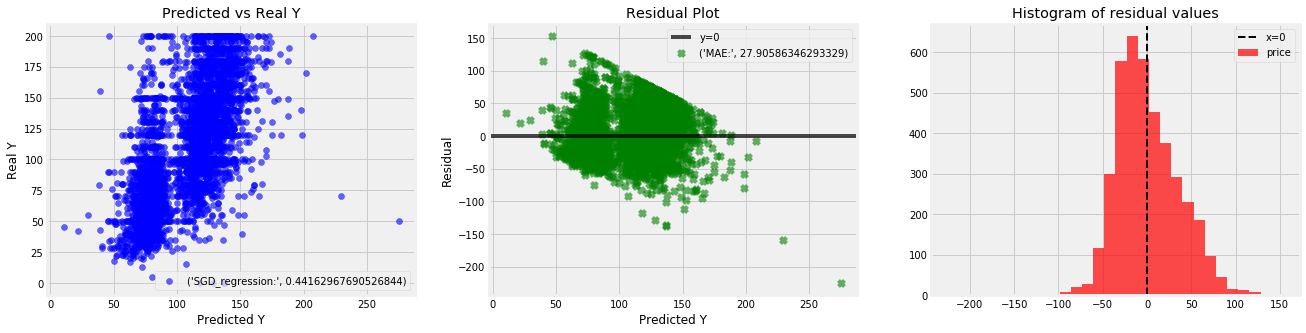

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(sgd_reg_gs.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("SGD_regression:", sgd_reg_gs.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(sgd_reg_gs.predict(Xs_test), y_test-sgd_reg_gs.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, sgd_reg_gs.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - sgd_reg_gs.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [39]:
value_coefs = pd.DataFrame({'coef':sgd_reg.coef_,
                            'abs_coef':np.abs(sgd_reg.coef_),
                            'variable':Xs_train.columns})
value_coefs.sort_values('abs_coef', ascending=False, inplace=True)
value_coefs.head(20)

,abs_coef,coef,variable
68,9.046208,9.046208,room_type_Entire home/apt
69,7.648734,-7.648734,room_type_Private room
5,6.513625,6.513625,accommodates
70,5.377233,-5.377233,room_type_Shared room
7,4.273955,4.273955,bedrooms
8,3.156372,3.156372,beds
4,3.102407,3.102407,longitude
27,2.826341,2.826341,property_type_Bed and breakfast
53,2.529930,-2.529930,property_type_Island
50,2.438131,-2.438131,property_type_House


## RandomizedSearchCV and RandomForestRegressor

In [40]:
#use a randomized search due to large number of parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]
}

In [41]:
rf = RandomForestRegressor()
# Random search of parameters, using 9 fold cross validation, 
# search across 1800 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 9, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs_train, y_train)
print rf_random.best_score_
print rf_random.best_params_

Fitting 9 folds for each of 200 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  7.5min finished


0.5594929590092798
{'min_samples_split': 10, 'max_features': 'sqrt', 'bootstrap': False, 'max_depth': 60, 'min_samples_leaf': 2}


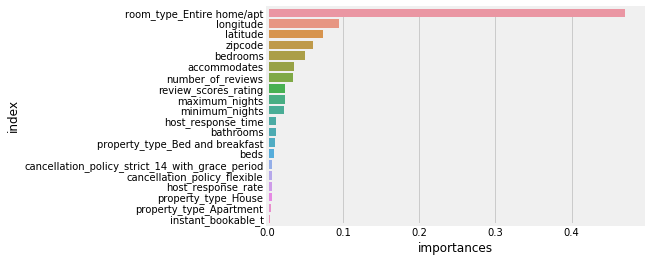

In [42]:
rf2 = RandomForestRegressor(min_samples_split= 2,
                             max_features= 'auto',
                             bootstrap= True,
                             max_depth= 30,
                             min_samples_leaf= 4)
rf2.fit(Xs_train, y_train)
importances = rf2.feature_importances_
std = np.std([rf2.feature_importances_ for tree in rf2.estimators_],
             axis=0)
fea_imp = pd.DataFrame(zip(importances,std), Xs_train.columns.values, columns = ['importances', 'std'])
fea_imp = fea_imp.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp[:20])

In [43]:
print "Random Forest Regression- Test R2 score:", rf2.score(Xs_test, y_test)

Random Forest Regression- Test R2 score: 0.45828699235679804


In [44]:
fea_imp.head(20)

,index,importances,std
0,room_type_Entire home/apt,0.470247,0.000000e+00
1,longitude,0.094288,1.387779e-17
2,latitude,0.073530,1.387779e-17
3,zipcode,0.060186,0.000000e+00
4,bedrooms,0.050154,6.938894e-18
5,accommodates,0.035917,6.938894e-18
6,number_of_reviews,0.033958,0.000000e+00
7,review_scores_rating,0.023751,3.469447e-18
8,maximum_nights,0.023418,0.000000e+00
9,minimum_nights,0.022225,0.000000e+00


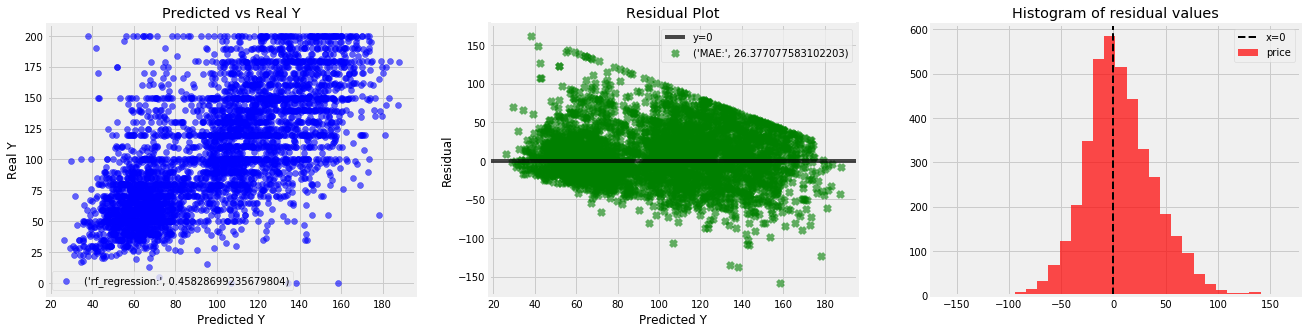

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(rf2.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("rf_regression:", rf2.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(rf2.predict(Xs_test), y_test-rf2.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

## GridSearchCV and XGBRegressor

In [85]:
xgb = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 9,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(Xs_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 9 folds for each of 9 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.3min finished


 0.597614921376
{'colsample_bytree': 0.7, 'silent': 1, 'learning_rate': 0.05, 'nthread': 4, 'min_child_weight': 4, 'n_estimators': 500, 'subsample': 0.7, 'objective': 'reg:linear', 'max_depth': 6}


In [65]:
# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params)
grid.fit(Xs_train, y_train)

# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(Xs_train))) 

# Save the file
y_test = grid.best_estimator_.predict(Xs_train)
results_df = pd.DataFrame(data={'y':y_test}) 

NameError: name 'r2_score' is not defined

In [86]:
xgb = XGBRegressor(colsample_bytree = 0.7, silent = 1, learning_rate = 0.03, nthread = 4, min_child_weight = 4, n_estimators = 500, subsample = 0.7, objective = 'reg:linear', max_depth = 7)

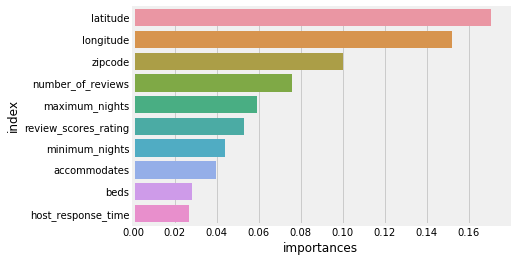

In [162]:
folds = 9
param_comb = 5
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 2)
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(Xs_train, y_train), verbose=3, random_state=99 )
# # Here we go
xgb.fit(Xs_train, y_train)

importances = xgb.feature_importances_
fea_imp_1 = pd.DataFrame(importances, Xs_train.columns.values, columns = ['importances'])
fea_imp_1 = fea_imp_1.sort_values('importances', ascending=False).reset_index()
sns.barplot('importances', 'index', data=fea_imp_1[:10])

In [163]:
fea_imp_1.head(10)

,index,importances
0,latitude,0.170630
1,longitude,0.152075
2,zipcode,0.099927
3,number_of_reviews,0.076022
4,maximum_nights,0.058956
5,review_scores_rating,0.053067
6,minimum_nights,0.043979
7,accommodates,0.039673
8,beds,0.028085
9,host_response_time,0.026723


In [50]:
print "XGB Regression- Test R2 score:", xgb.score(Xs_test, y_test)

XGB Regression- Test R2 score: 0.5075217515755167


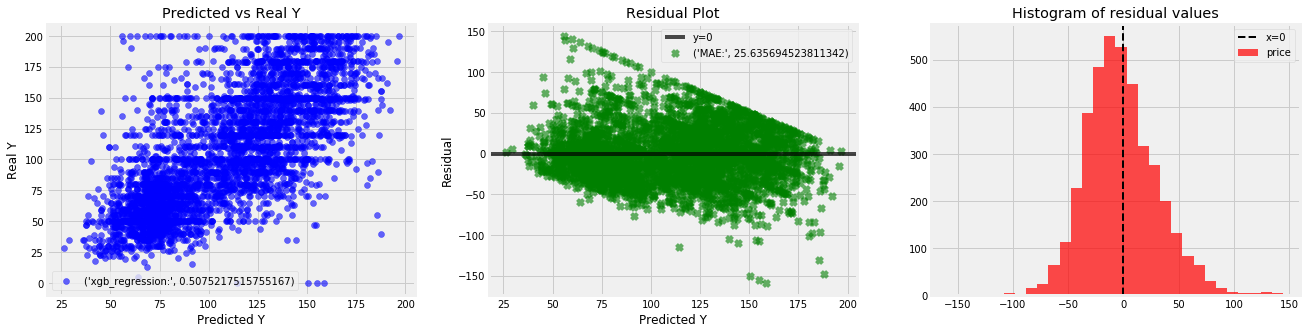

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

# Predicted vs Real y
ax1.scatter(xgb.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("xgb_regression:", xgb.score(Xs_test, y_test)))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(xgb.predict(Xs_test), y_test-xgb.predict(Xs_test), color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - xgb.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

## Score for all models

In [52]:
lr_columns = lr_coefs.variable.values
rr_columns = rr_coefs.variable.values
lasso_columns = lasso_coefs.variable.values
elastic_columns = elastic_coefs.variable.values
bayes_columns = bayes_coefs.variable.values
OMP_columns = OMP_coefs.variable.values
kbest_columns = kbest.feature.values
sgd_reg_columns = value_coefs.variable.values
rf_random_columns = fea_imp['index'].values
xgb_columns = fea_imp_1['index'].values

In [75]:
# Defining a function to test our best features head to head.
# def score_lr(Xs_train):
#     scores_lr = cross_val_score(lr, Xs_train, y_train, cv=9)
#     return scores_lr.mean(), scores_lr.std()

# def score_rr(Xs_train):
#     scores_rr = cross_val_score(rr, Xs_train, y_train, cv=9)
#     return scores_rr.mean(), scores_rr.std()

# def score_lasso(Xs_train):
#     scores_lasso = cross_val_score(lasso, Xs_train, y_train, cv=9)
#     return scores_lasso.mean(), scores_lasso.std()

# def score_elastic(Xs_train):
#     scores_elastic = cross_val_score(elastic, Xs_train, y_train, cv=9)
#     return scores_elastic.mean(), scores_elastic.std()

# def score_bayes(Xs_train):
#     scores_bayes = cross_val_score(bayes, Xs_train, y_train, cv=9)
#     return scores_bayes.mean(), scores_bayes.std()

# def score_OMP(Xs_train):
#     scores_OMP = cross_val_score(OMP, Xs_train, y_train, cv=9)
#     return scores_OMP.mean(), scores_OMP.std()

# def score_skb_fr(Xs_train):
#     scores_skb_fr = cross_val_score(lr, Xs_train, y_train, cv=9)
#     return scores_skb_fr.mean(), scores_skb_fr.std()

# def score_rfecv(Xs_train):
#     scores_rfecv = cross_val_score(lr, Xs_train, y_train, cv=9)
#     return scores_rfecv.mean(), scores_rfecv.std()

# def score_sgd_reg_gs(Xs_train):
#     scores_sgd_reg_gs = cross_val_score(sgd_reg_gs, Xs_train, y_train, cv=9)
#     return scores_sgd_reg_gs.mean(), scores_sgd_reg_gs.std()

# def score_rf_random(Xs_train):
#     scores_rf_random = cross_val_score(rf2, Xs_train, y_train, cv=9)
#     return scores_rf_random.mean(), scores_rf_random.std()

# def score_xgb(Xs_train):
#     scores_xgb = cross_val_score(xgb, Xs_train, y_train, cv=9)
#     return scores_xgb.mean(), scores_xgb.std()


# def score_lr_2(Xs_test):
#     scores_lr_2 = cross_val_score(lr, Xs_test, y_test, cv=9)
#     return scores_lr_2.mean(), scores_lr_2.std()

# def score_rr_2(Xs_test):
#     scores_rr_2 = cross_val_score(rr, Xs_test, y_test, cv=9)
#     return scores_rr_2.mean(), scores_rr_2.std()

def score_lasso_2(Xs_test):
    scores_lasso_2 = cross_val_score(lasso, Xs_test, y_test, cv=9)
    return scores_lasso_2.mean(), scores_lasso_2.std()

def score_elastic_2(Xs_test):
    scores_elastic_2 = cross_val_score(elastic, Xs_test, y_test, cv=9)
    return scores_elastic_2.mean(), scores_elastic_2.std()

def score_bayes_2(Xs_test):
    scores_bayes_2 = cross_val_score(bayes, Xs_test, y_test, cv=9)
    return scores_bayes_2.mean(), scores_bayes_2.std()

# def score_OMP_2(Xs_test):
#     scores_OMP_2 = cross_val_score(OMP, Xs_test, y_test, cv=9)
#     return scores_OMP_2.mean(), scores_OMP_2.std()

# def score_skb_fr_2(Xs_test):
#     scores_skb_fr_2 = cross_val_score(lr, Xs_test, y_test, cv=9)
#     return scores_skb_fr_2.mean(), scores_skb_fr_2.std()

# def score_rfecv_2(Xs_test):
#     scores_rfecv_2 = cross_val_score(lr, Xs_test, y_test, cv=9)
#     return scores_rfecv_2.mean(), scores_rfecv_2.std()

# def score_sgd_reg_gs_2(Xs_test):
#     scores_sgd_reg_gs_2 = cross_val_score(sgd_reg_gs, Xs_test, y_test, cv=9)
#     return scores_sgd_reg_gs_2.mean(), scores_sgd_reg_gs_2.std()

def score_rf_random_2(Xs_test):
    scores_rf_random_2 = cross_val_score(rf2, Xs_test, y_test, cv=9)
    return scores_rf_random_2.mean(), scores_rf_random_2.std()

def score_xgb_2(Xs_test):
    scores_xgb_2 = cross_val_score(xgb, Xs_test, y_test, cv=9)
    return scores_xgb_2.mean(), scores_xgb_2.std()

# A list of all of our lists of best features being executed in the score function.
# all_scores_train = [
#     score_lr(Xs_train[lr_columns]),
#     score_rr(Xs_train[rr_columns]),
#     score_lasso(Xs_train[lasso_columns]),
#     score_elastic(Xs_train[elastic_columns]),
#     score_bayes(Xs_train[bayes_columns]),
#     score_OMP(Xs_train[OMP_columns]),
#     score_skb_fr(Xs_train[kbest_columns]),
#     score_rfecv(Xs_train[rfecv_columns]),
#     score_sgd_reg_gs(Xs_train[sgd_reg_columns]),
#     score_rf_random(Xs_train[rf_random_columns]),
#     score_xgb(Xs_train[xgb_columns]),
#     ]

all_scores_test = [
#     score_lr_2(Xs_test[lr_columns]),
#     score_rr_2(Xs_test[rr_columns]),
    score_lasso_2(Xs_test[lasso_columns]),
    score_elastic_2(Xs_test[elastic_columns]),
    score_bayes_2(Xs_test[bayes_columns]),
#     score_OMP_2(Xs_test[OMP_columns]),
#     score_skb_fr_2(Xs_test[kbest_columns]),
#     score_rfecv_2(Xs_test[rfecv_columns]),
#     score_sgd_reg_gs_2(Xs_test[sgd_reg_columns]),
    score_rf_random_2(Xs_test[rf_random_columns]),
    score_xgb_2(Xs_test[xgb_columns]),
    ]

# Putting results into a DataFrame.
# all_scores = pd.DataFrame(all_scores_train, columns=['train mean score', 'train std score'], index = ['linear_model','ridge_model', 'lasso_model','elastic_model', 'bayes_model', 'OMP_model', 'Kbest_model', 'rfecv_model','sgd_reg_model', 'rf_model', 'xgb_model'])
all_scores = pd.DataFrame(all_scores_test, columns=['test mean score', 'test std score'], index = ['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
# all_scores = pd.merge(all_scores_train_df, all_scores_test_df, left_index=True, right_index=True)
# all_scores

In [76]:
all_scores

,test mean score,test std score
lasso_model,0.475372,0.048368
elastic_model,0.474834,0.046526
bayes_model,0.473757,0.048766
rf_model,0.506616,0.047893
xgb_model,0.540294,0.037591


## R2 scores for all model (Bar Chart)

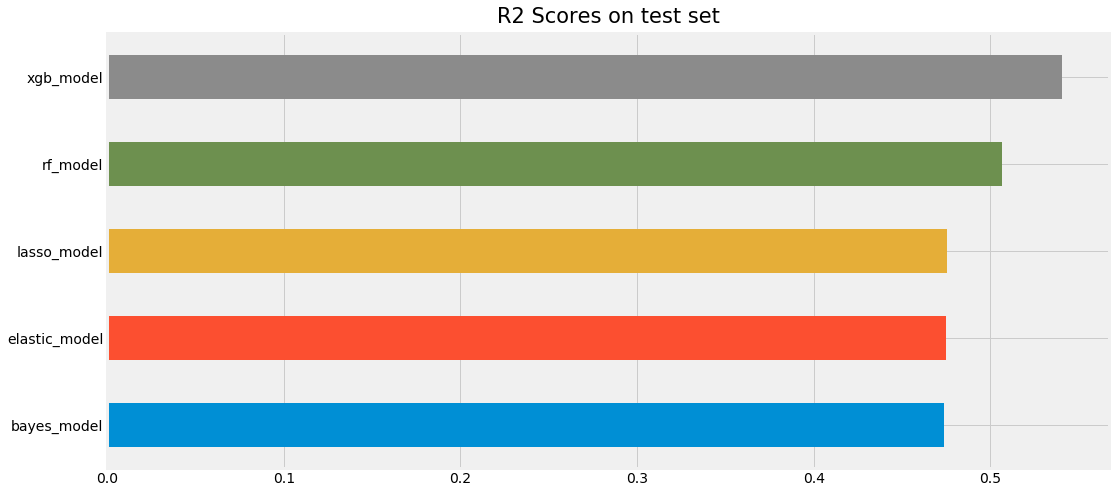

In [149]:
# set the title
plt.title('R2 Scores on test set', fontsize=21, y=1.01)

ax = all_scores['test mean score'].sort_values(ascending=True).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

Due to there are extremely negative R2 score for linear model and kbest model which mean these models fits worse than the baseline. Hence we excluded these models from our analysis. We replot the horizontal bar graph without showing the negative R2 score to better see the R2 score for chosen model.

We can obviously see the the Random Forest Regressor model and XGB Regressor model outperformed other chosen models. Hence, we further analyse these 2 models. 

Test set


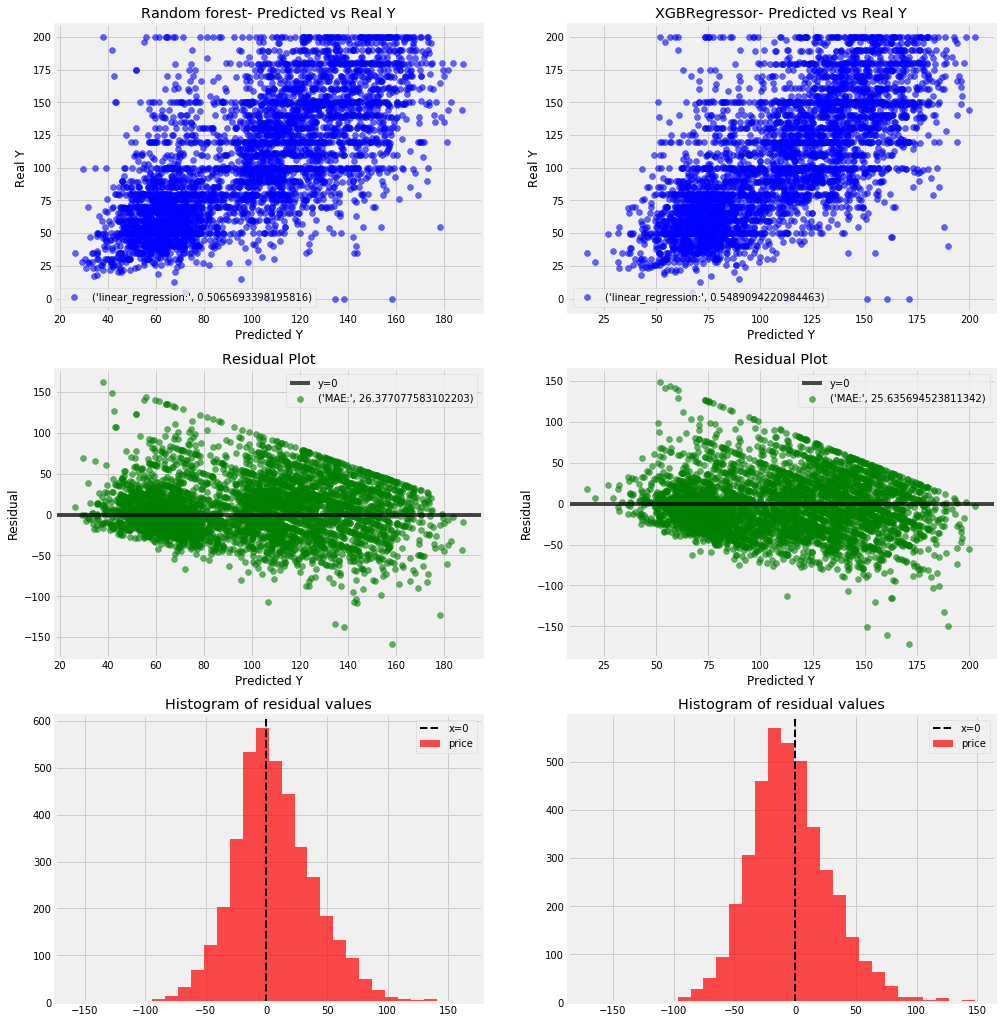

In [58]:
print 'Test set'
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
ax5 = axes[2][0]
ax6 = axes[2][1]

ax1.scatter(rf2.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(rf2, Xs_test, y_test, cv=9))))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Random forest- Predicted vs Real Y')

ax2.scatter(xgb_grid.predict(Xs_test), y_test, color='blue', alpha=0.6, label=("linear_regression:", np.mean(cross_val_score(xgb, Xs_test, y_test, cv=9))))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Real Y')
ax2.legend(loc='best')
ax2.set_title('XGBRegressor- Predicted vs Real Y')

ax3.scatter(rf2.predict(Xs_test), y_test-rf2.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax3.set_ylabel('Residual')
ax3.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax3.legend(loc='best')
ax3.set_title('Residual Plot')

ax4.scatter(xgb_grid.predict(Xs_test), y_test-xgb_grid.predict(Xs_test), color='green', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))))
ax3.set_xlabel('Predicted Y')
ax4.set_xlabel('Predicted Y')
ax4.set_ylabel('Residual')
ax4.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax4.legend(loc='best')
ax4.set_title('Residual Plot')

ax5.hist(y_test - rf2.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax5.set_title('Histogram of residual values')
ax5.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax5.legend(loc='best')

ax6.hist(y_test - xgb_grid.predict(Xs_test), bins=30, color='red', alpha=0.7)
ax6.set_title('Histogram of residual values')
ax6.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax6.legend(loc='best')

## Metrics to measure accuracy for continuous variables

In [91]:
print 'Test set'
print '------------------------------------\n'

print "Median Absolute Error"
# print "LINER MAE:", metrics.median_absolute_error(y_test, lr.predict(Xs_test))
# print "RIDGE MAE:", metrics.median_absolute_error(y_test, rr.predict(Xs_test))
print "LASSO MAE:", metrics.median_absolute_error(y_test, lasso.predict(Xs_test))
print "ELASTIC MAE:", metrics.median_absolute_error(y_test, elastic.predict(Xs_test))
print "BAYES MAE:", metrics.median_absolute_error(y_test, bayes.predict(Xs_test))
# print "OMP MAE:", metrics.median_absolute_error(y_test, OMP.predict(Xs_test))
# print "SGD MAE:", metrics.median_absolute_error(y_test, sgd_reg_gs.predict(Xs_test))
print "RANDOM FOREST MAE:", metrics.median_absolute_error(y_test, rf2.predict(Xs_test))
print "XGB MAE:", metrics.median_absolute_error(y_test, xgb.predict(Xs_test))
print '------------------------------------\n'

print "Mean Absolute Error"
# print "LINER MAE:", mean_absolute_error(y_test, lr.predict(Xs_test))
# print "RIDGE MAE:", mean_absolute_error(y_test, rr.predict(Xs_test))
print "LASSO MAE:", mean_absolute_error(y_test, lasso.predict(Xs_test))
print "ELASTIC MAE:", mean_absolute_error(y_test, elastic.predict(Xs_test))
print "BAYES MAE:", mean_absolute_error(y_test, bayes.predict(Xs_test))
# print "OMP MAE:", mean_absolute_error(y_test, OMP.predict(Xs_test))
# print "SGD MAE:", mean_absolute_error(y_test, sgd_reg_gs.predict(Xs_test))
print "RANDOM FOREST MAE:", mean_absolute_error(y_test, rf2.predict(Xs_test))
print "XGB MAE:", mean_absolute_error(y_test, xgb.predict(Xs_test))
print '------------------------------------\n'

print "Root Mean Square Error"
# print "LINER RMSE:", sqrt(mean_squared_error(y_test, lr.predict(Xs_test)))
# print "RIDGE RMSE:", sqrt(mean_squared_error(y_test, rr.predict(Xs_test)))
print "LASSO RMSE:", sqrt(mean_squared_error(y_test, lasso.predict(Xs_test)))
print "ELASTIC RMSE:", sqrt(mean_squared_error(y_test, elastic.predict(Xs_test)))
print "BAYES RMSE:", sqrt(mean_squared_error(y_test, bayes.predict(Xs_test)))
# print "OMP RMSE:", sqrt(mean_squared_error(y_test, OMP.predict(Xs_test)))
# print "SGD RMSE:", sqrt(mean_squared_error(y_test, sgd_reg_gs.predict(Xs_test)))
print "RANDOM FOREST RMSE:", sqrt(mean_squared_error(y_test, rf2.predict(Xs_test)))
print "XGB RMSE:", sqrt(mean_squared_error(y_test, xgb.predict(Xs_test)))



Test set
------------------------------------

Median Absolute Error
LASSO MAE: 21.907549170550325
ELASTIC MAE: 21.92668094872657
BAYES MAE: 21.88801401823467
RANDOM FOREST MAE: 20.514713897213902
XGB MAE: 21.16168975830078
------------------------------------

Mean Absolute Error
LASSO MAE: 26.406709977623983
ELASTIC MAE: 26.432332089213066
BAYES MAE: 26.403606882866857
RANDOM FOREST MAE: 26.377077583102203
XGB MAE: 25.635694523811342
------------------------------------

Root Mean Square Error
LASSO RMSE: 33.9336879463
ELASTIC RMSE: 33.919846156
BAYES RMSE: 33.9374187298
RANDOM FOREST RMSE: 34.6186559163
XGB RMSE: 33.0079913602


In [100]:
Median_Absolute_Error_list= [metrics.median_absolute_error(y_test, lasso.predict(Xs_test)), metrics.median_absolute_error(y_test, elastic.predict(Xs_test)), metrics.median_absolute_error(y_test, bayes.predict(Xs_test)), metrics.median_absolute_error(y_test, rf2.predict(Xs_test)), metrics.median_absolute_error(y_test, xgb.predict(Xs_test))]
Mean_Absolute_Error_list= [mean_absolute_error(y_test, lasso.predict(Xs_test)), mean_absolute_error(y_test, elastic.predict(Xs_test)), mean_absolute_error(y_test, bayes.predict(Xs_test)), mean_absolute_error(y_test, rf2.predict(Xs_test)), mean_absolute_error(y_test, xgb.predict(Xs_test))]
Root_Mean_Square_Error_list= [sqrt(mean_squared_error(y_test, lasso.predict(Xs_test))), sqrt(mean_squared_error(y_test, elastic.predict(Xs_test))), sqrt(mean_squared_error(y_test, bayes.predict(Xs_test))), sqrt(mean_squared_error(y_test, rf2.predict(Xs_test))), sqrt(mean_squared_error(y_test, xgb.predict(Xs_test)))]

In [109]:
Median_Absolute_Error= pd.DataFrame(Median_Absolute_Error_list, columns=['median_AE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Median_Absolute_Error

,median_AE
lasso_model,21.907549
elastic_model,21.926681
bayes_model,21.888014
rf_model,20.514714
xgb_model,21.161690


In [110]:
Mean_Absolute_Error= pd.DataFrame(Mean_Absolute_Error_list, columns=['mean_AE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Mean_Absolute_Error

,mean_AE
lasso_model,26.406710
elastic_model,26.432332
bayes_model,26.403607
rf_model,26.377078
xgb_model,25.635695


In [111]:
Root_Mean_Square_Error= pd.DataFrame(Root_Mean_Square_Error_list, columns=['RMSE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
Root_Mean_Square_Error

,RMSE
lasso_model,33.933688
elastic_model,33.919846
bayes_model,33.937419
rf_model,34.618656
xgb_model,33.007991


In [116]:
error =pd.DataFrame(zip(all_scores['test mean score'], Median_Absolute_Error_list, Mean_Absolute_Error_list, Root_Mean_Square_Error_list), columns=['R2 score', 'median_AE', 'mean_AE', 'RMSE'], index=['lasso_model','elastic_model', 'bayes_model', 'rf_model', 'xgb_model'])
error

,R2 score,median_AE,mean_AE,RMSE
lasso_model,0.475372,21.907549,26.406710,33.933688
elastic_model,0.474834,21.926681,26.432332,33.919846
bayes_model,0.473757,21.888014,26.403607,33.937419
rf_model,0.506616,20.514714,26.377078,34.618656
xgb_model,0.540294,21.161690,25.635695,33.007991


In [144]:
error.style.apply(lambda x: [('background: lightblue' if x.name == 'R2 score' and i == 'xgb_model' 
                              else ('background: lightblue' if x.name == 'median_AE' and i == 'rf_model' else
                                    ('background: lightblue' if x.name == 'mean_AE' and i == 'xgb_model' else 
                                    ('background: lightblue' if x.name == 'RMSE' and i == 'xgb_model' else
                                     ('background: red' if x.name == 'R2 score' and i == 'bayes_model' else
                                      ('background: red' if x.name == 'mean_AE' and i == 'elastic_model' else
                                       ('background: red' if x.name == 'RMSE' and i == 'rf_model' else
                                     ('background: red' if x.name == 'median_AE' and i == 'elastic_model' else'')))))))) 
                            for i,_ in x.iteritems()])

,R2 score,median_AE,mean_AE,RMSE
lasso_model,0.475372,21.9075,26.4067,33.9337
elastic_model,0.474834,21.9267,26.4323,33.9198
bayes_model,0.473757,21.888,26.4036,33.9374
rf_model,0.506616,20.5147,26.3771,34.6187
xgb_model,0.540294,21.1617,25.6357,33.008


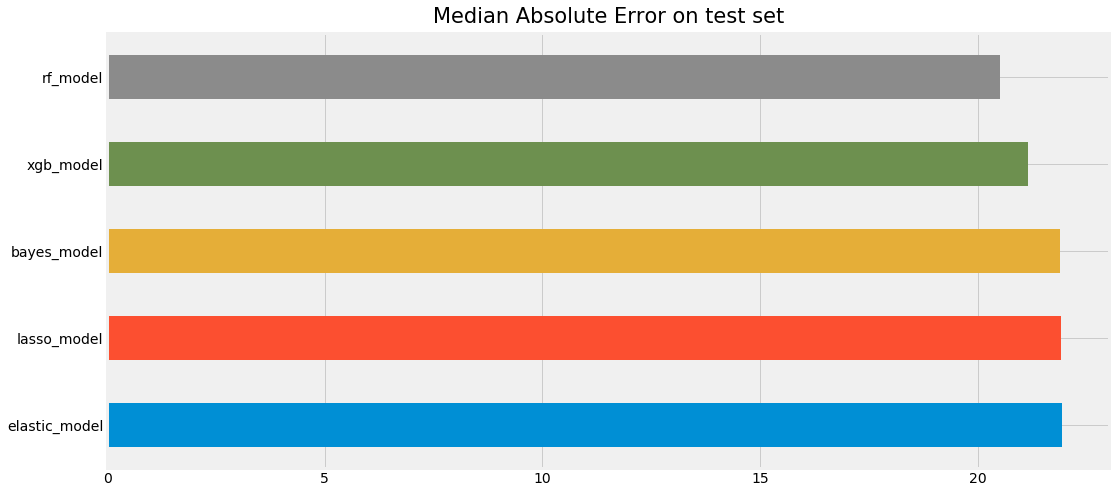

In [146]:
# set the title
plt.title('Median Absolute Error on test set', fontsize=21, y=1.01)

ax = error['median_AE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

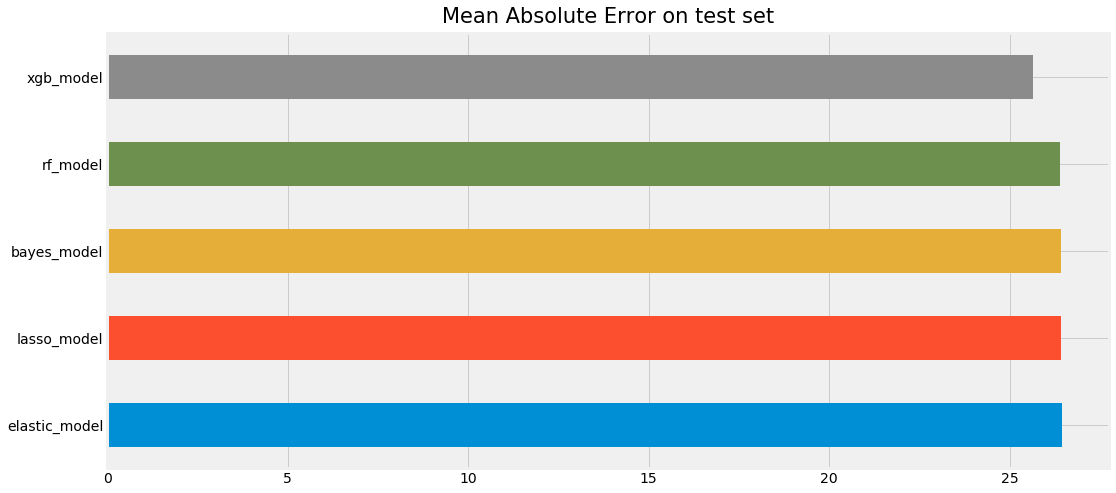

In [147]:
# set the title
plt.title('Mean Absolute Error on test set', fontsize=21, y=1.01)

ax = error['mean_AE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

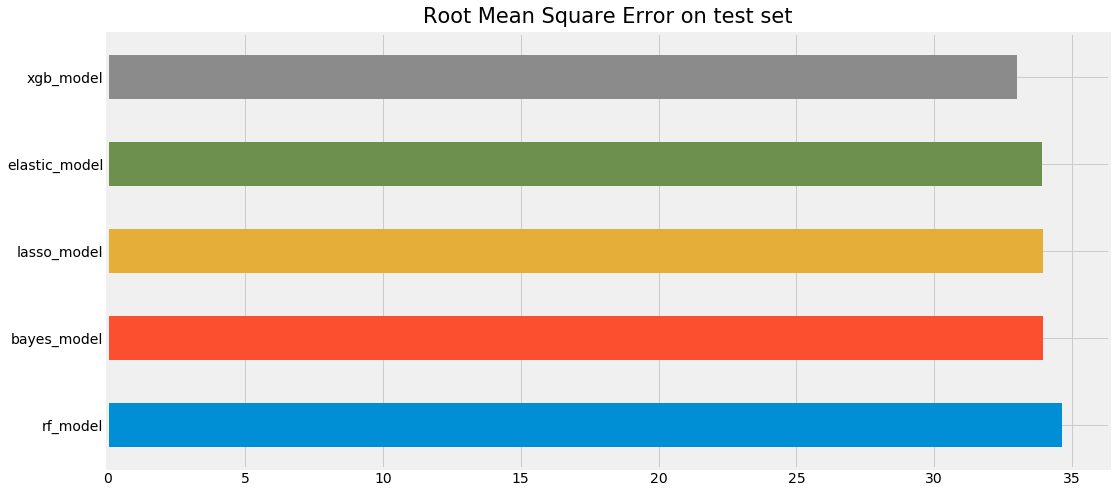

In [148]:
# set the title
plt.title('Root Mean Square Error on test set', fontsize=21, y=1.01)

ax = error['RMSE'].sort_values(ascending=False).plot(kind='barh', 
            figsize=(16,8), 
            fontsize=14)

In [160]:
print'average price:', df_sample.price.mean()

average price: 106.05085


### Root Mean Square Error (RMSE)
At first, we look at the Root Mean Square Error (RMSE). The errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. However, RMSE is more sensitive to outliers

### Mean Absolute Error and Median Absolute Error
Mean Absolute Error and Median Absolute Error are more steady compare to Root Mean Square Error (RMSE). Absolute values take both positive and negative errors into consideration. MAE yields the advantage of a model that is less sensitive to these outliers and is also more intuitive when comparing a score obtained relative to price. 

Mean is a widely preferred when the sample when the sample is normally distributed as the best measure of central tendency because it is the measure that includes all the values in the data set for its calculation, and any change in any of the scores will affect the value of the mean. 

The more skewed the distribution, the greater the difference between the median and mean, and the greater emphasis should be placed on using the median as opposed to the mean as mean provide a false presentation of typical distribution.

In this cases, the Histogram of residual value seems to be normally distributed and outliner are not necessarily to give larger penalty in this case as the outliners do not have larger effect as it seems to be. Mean Absolute Error is more appropriate. 


## Conclusion

From the comparsion, we could see that XGB Regressors achieve slightly higher R2 score than RandomForest Regressor in both train and test set. However, a high R2 score does not necessarily indicate that the model has a good fit. The scatter plot displays the relationship between standardized independent variables and the log of the price. From the residual plot of test set, we could obviously see the RandomForest Regressor achieves lower Mean Absolute Error (MAE) than XGB Regressor. From the feature engineering, we could see the feature selected by RandomForest Regressor make more sense than XGB Regressor. 

Based on the analysis above, we could see that RandomForest Regressor would be a better model.

# Thing gonna to try next:

### 1. Hyper parameter tuning
### 2. Classification report
### 3. Using log for modeling
### 4. NLP for text features that give a better review rating
### 5. Plot the longitude and latitude on the map
### 6. Predicting Optimal Listing Prices